In [290]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Bach\anaconda3\python.exe -m pip install --upgrade pip' command.


In [315]:
from pathlib import Path
import pandas as pd #data analysis
from sklearn.model_selection import train_test_split #machine learning
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge, LogisticRegression, LogisticRegressionCV
import statsmodels.formula.api as sm #statistics and econometrics
import matplotlib.pylab as plt #plotting library
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import dmba

%matplotlib inline


In [316]:
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')
df = pd.concat([df1,df2],axis = 0)

In [317]:
# Add column Weekly Conumption - AlWeekly_Cons as the sum of 'Dalc' & 'Walc'
df['AlWeekly_Cons'] = round((df['Dalc']+ df['Walc'])/2,0) # 1- 10
df['AlWeekly_Sum'] = round((df['Dalc']+ df['Walc']),0) # 1- 10

#changed this to average as 1-10 spread the prediction too wide and didn't give the most conclusive prediction.

# Drop column G1 and G2 as we only need G3 - final grade and drop 'Dalc' and 'Walc' because we have the weekly sum
df = df.drop(columns = ['G1','G2','Dalc','Walc'],axis = 1)


In [318]:
# Add Success column with two value yes and no based on the G3 column
# We choose threshold of 11 to decide whether a student is academically successful or not (1 point bigger than average which is 10)
df['Success'] = df.apply(lambda x: 'yes' if x['G3'] >= 11 else 'no',axis = 1)
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  romantic famrel  freetime  goout  health absences  G3 AlWeekly_Cons  \
0       no      4         3      4       3        6   6           1.0   
1       no      5         3      3       3        4   6           1.0   
2       no      4         3      2       3       10  10           2.0   
3      yes      3         2      2       5        2  15           1.0   
4       no      4         3      2       5        4  10           2.0   

  AlWeekly_Sum Success  
0            2      no  
1            2      no  

In [319]:
#df = pd.read_csv('student.csv')
df
#df['Medu'] = df['Medu'].astype('category')
#df['Fedu'] = df['Fedu'].astype('category')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,health,absences,G3,AlWeekly_Cons,AlWeekly_Sum,Success
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,3,6,6,1.0,2,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,3,4,6,1.0,2,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,3,10,10,2.0,5,no
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,5,2,15,1.0,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,5,4,10,2.0,3,no
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,5,10,15,2.0,3,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,3,0,11,1.0,2,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,6,6,1.0,2,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,0,19,1.0,2,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,5,0,15,1.0,2,yes


In [320]:
#Check with running everything. 
predictors = ['famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup',
              'Pstatus'] #select the desired columns
#predictors = ['famsize', 'Medu', 'Mjob', 'Fjob', 'guardian', 'famsup',
              #'Pstatus'] #remove FEDU

In [321]:
outcome = 'AlWeekly_Cons' #define the outcome variable
# partition data
# Check indexing
#make MEDU AND FEDU AS CATEGORICALS

X = pd.get_dummies(df[predictors], drop_first=True) #convert categorical variables into dummy

In [322]:
#print(X)

In [323]:
y = df[outcome] #assign the outcome to y
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #partition the data to train/test

student_lm = LinearRegression() #assign the linear regression model
student_lm.fit(train_X, train_y) #linear regeression on the training set

LinearRegression()

In [324]:
# print coefficients
print('intercept ', student_lm.intercept_)
pd.set_option('display.max_rows', None)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': student_lm.coef_}))

# print performance measures
regressionSummary(train_y, student_lm.predict(train_X))

intercept  1.4698933625616917
          Predictor  coefficient
0              Medu    -0.043874
1              Fedu     0.061539
2       famsize_LE3     0.225482
3       Mjob_health    -0.000035
4        Mjob_other    -0.006814
5     Mjob_services     0.154944
6      Mjob_teacher     0.113872
7       Fjob_health     0.239665
8        Fjob_other     0.231526
9     Fjob_services     0.404028
10     Fjob_teacher     0.092257
11  guardian_mother    -0.062654
12   guardian_other     0.070886
13       famsup_yes    -0.176555
14        Pstatus_T     0.231477

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.9521
            Mean Absolute Error (MAE) : 0.7053
          Mean Percentage Error (MPE) : -23.3418
Mean Absolute Percentage Error (MAPE) : 44.3838


In [325]:
pred_y = student_lm.predict(train_X) #prediction performance on the training set 

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, student_lm))
print('AIC : ', AIC_score(train_y, pred_y, student_lm))
print('BIC : ', BIC_score(train_y, pred_y, student_lm))

adjusted r2 :  0.023612249330097534
AIC :  1749.046953470534
BIC :  1824.5159097792357


As this prediction gives continuous,decimal value, for an integer/categorical outcome (1,2,3,4,5). I'm applying rounding to the predicted value. 

In [326]:
import numpy as np

# Use predict() to make predictions on a new set
student_lm_pred = student_lm.predict(valid_X)

# Round the predictions
student_lm_pred_rounded = np.round(student_lm_pred)
# Clip values to be within the range [1, 5]
student_lm_pred_clipped = np.clip(student_lm_pred_rounded, 1, 5)

result = pd.DataFrame({'Predicted': student_lm_pred_clipped, 'Actual': valid_y,
                       'Residual': valid_y - student_lm_pred_clipped}) #dataframe with three columns
print(result)

# Compute common accuracy measures
regressionSummary(valid_y, student_lm_pred_clipped)

     Predicted  Actual  Residual
155        2.0     2.0       0.0
78         2.0     1.0      -1.0
335        2.0     2.0       0.0
313        2.0     1.0      -1.0
99         1.0     1.0       0.0
227        2.0     3.0       1.0
165        2.0     1.0      -1.0
94         2.0     1.0      -1.0
472        2.0     1.0      -1.0
307        2.0     4.0       2.0
549        2.0     2.0       0.0
168        2.0     1.0      -1.0
175        2.0     4.0       2.0
194        2.0     1.0      -1.0
280        2.0     2.0       0.0
255        2.0     2.0       0.0
342        2.0     2.0       0.0
217        2.0     2.0       0.0
52         2.0     4.0       2.0
49         2.0     1.0      -1.0
35         2.0     1.0      -1.0
378        2.0     4.0       2.0
310        2.0     2.0       0.0
101        2.0     1.0      -1.0
576        2.0     5.0       3.0
369        2.0     4.0       2.0
324        2.0     3.0       1.0
245        2.0     1.0      -1.0
86         2.0     2.0       0.0
446       

1.0


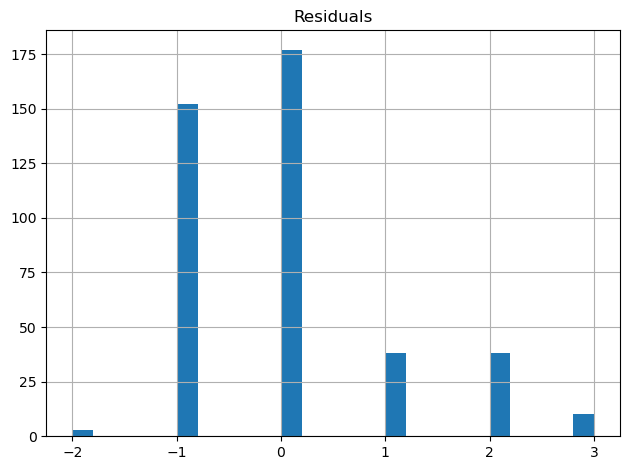

In [327]:
import matplotlib.pyplot as plt

# Predict on a new set
student_lm_pred = student_lm.predict(valid_X)

# Round the predictions
student_lm_pred_rounded = np.round(student_lm_pred)
# Clip values to be within the range [1, 5]
student_lm_pred_clipped = np.clip(student_lm_pred_rounded, 1, 5)

# Compute residuals based on the rounded and clipped predictions
all_residuals = valid_y - student_lm_pred_clipped

# Determine the percentage of datapoints with a residual in [-1406, 1406]
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

# Plotting the residuals
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()


In [328]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Lasso(alpha=1)],
])
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = Pipeline([
    ['normalize', StandardScaler()],
    ['model', LassoCV(cv=5)],
])
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv['model'].alpha_)
print(lasso_cv['model'].coef_)

ridge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Ridge(alpha=1)],
])
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))

bayesianRidge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', BayesianRidge()],
])
bayesianRidge.fit(train_X, train_y)
regressionSummary(valid_y, bayesianRidge.predict(valid_X))
print('Bayesian ridge chosen regularization: ',
      bayesianRidge['model'].lambda_ / bayesianRidge['model'].alpha_)


Regression statistics

                      Mean Error (ME) : 0.0344
       Root Mean Squared Error (RMSE) : 1.0176
            Mean Absolute Error (MAE) : 0.7292
          Mean Percentage Error (MPE) : -24.0299
Mean Absolute Percentage Error (MAPE) : 45.4497

Regression statistics

                      Mean Error (ME) : 0.0254
       Root Mean Squared Error (RMSE) : 1.0114
            Mean Absolute Error (MAE) : 0.7350
          Mean Percentage Error (MPE) : -24.3930
Mean Absolute Percentage Error (MAPE) : 45.9162
Lasso-CV chosen regularization:  0.04881911065703528
[-0.          0.          0.05059048 -0.         -0.          0.00569757
  0.          0.         -0.          0.06761169 -0.         -0.
  0.         -0.02967306  0.01421741]

Regression statistics

                      Mean Error (ME) : 0.0190
       Root Mean Squared Error (RMSE) : 1.0177
            Mean Absolute Error (MAE) : 0.7637
          Mean Percentage Error (MPE) : -24.5334
Mean Absolute Percentage Error (M

In [329]:
linearRegression = Pipeline([
    ['normalize', StandardScaler()],
    ['model', LinearRegression()],
])
linearRegression.fit(train_X, train_y)
regressionSummary(valid_y, linearRegression.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0190
       Root Mean Squared Error (RMSE) : 1.0178
            Mean Absolute Error (MAE) : 0.7638
          Mean Percentage Error (MPE) : -24.5335
Mean Absolute Percentage Error (MAPE) : 47.4627


In [330]:
pd.DataFrame({
    'features': train_X.columns,
    'linear regression': linearRegression['model'].coef_,
    'lassoCV': lasso_cv['model'].coef_,
    'bayesianRidge': bayesianRidge['model'].coef_,
})

,features,linear regression,lassoCV,bayesianRidge
0,Medu,-0.050474,-0.000000,-0.009270
1,Fedu,0.068438,0.000000,0.017911
2,famsize_LE3,0.103203,0.050590,0.049342
3,Mjob_health,-0.000009,-0.000000,-0.006128
4,Mjob_other,-0.003291,-0.000000,-0.014126
5,Mjob_services,0.065523,0.005698,0.026887
6,Mjob_teacher,0.038419,0.000000,0.009064
7,Fjob_health,0.048688,0.000000,0.001938
8,Fjob_other,0.114665,-0.000000,-0.006159
9,Fjob_services,0.176594,0.067612,0.049251


In [331]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'AlWeekly_Cons ~ ' + ' + '.join(predictors)

student_lm = sm.ols(formula=formula, data=train_df).fit()
print(student_lm.summary())

                            OLS Regression Results                            
Dep. Variable:          AlWeekly_Cons   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.172
Date:                Mon, 25 Sep 2023   Prob (F-statistic):            0.00599
Time:                        20:39:23   Log-Likelihood:                -1264.1
No. Observations:                 912   AIC:                             2560.
Df Residuals:                     896   BIC:                             2637.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4174      0.213     

Logistic Regression

In [332]:
#Adding a column to split low and high alcohol consumption
df['Alcohol_Consumption_High'] = df['AlWeekly_Sum'].apply(lambda x: 0 if x < 4 else 1)



In [333]:
y_LR = df['Alcohol_Consumption_High'] #define the outcome variable

#classes = ['low', 'high']

# split into training and validation
train_X, valid_X, train_y_LR, valid_y_LR = train_test_split(X, y_LR, test_size=0.4,
                                                      random_state=1)

logit_red = LogisticRegressionCV(penalty="l1", solver='liblinear', cv=5)
logit_red.fit(train_X, train_y_LR)

pd.set_option('display.width', 100)
print('regularization', logit_red.C_)
print('intercept ', logit_red.intercept_[0])
print(pd.DataFrame({'coeff': logit_red.coef_[0]}, index=X.columns).transpose())
pd.reset_option('display.width')
print('AIC', AIC_score(valid_y_LR, logit_red.predict(valid_X), df=len(train_X.columns) + 1))


# confusion matrix
classificationSummary(valid_y_LR, logit_red.predict(valid_X))

regularization [21.5443469]
intercept  -1.699402633126475
           Medu      Fedu  famsize_LE3  Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  \
coeff -0.241817  0.309186     0.561581     0.434953   -0.084608       0.623973      0.614319   

       Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  guardian_mother  guardian_other  \
coeff    -0.616141    0.599061       0.678081     -0.330215        -0.232515        0.271716   

       famsup_yes  Pstatus_T  
coeff   -0.459874    0.98097  
AIC 918.3214742032252
Confusion Matrix (Accuracy 0.5144)

       Prediction
Actual   0   1
     0 144  75
     1 128  71


Random forest

In [334]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

            feature  importance       std
1              Fedu    0.225094  0.043602
0              Medu    0.185704  0.048759
13       famsup_yes    0.084517  0.044139
11  guardian_mother    0.080285  0.032186
2       famsize_LE3    0.072726  0.038968
4        Mjob_other    0.051892  0.027982
8        Fjob_other    0.048646  0.022431
5     Mjob_services    0.044894  0.019661
14        Pstatus_T    0.041258  0.017056
9     Fjob_services    0.040077  0.020963
6      Mjob_teacher    0.031060  0.014653
3       Mjob_health    0.028717  0.012755
12   guardian_other    0.028542  0.011686
7       Fjob_health    0.019026  0.010618
10     Fjob_teacher    0.017561  0.010035


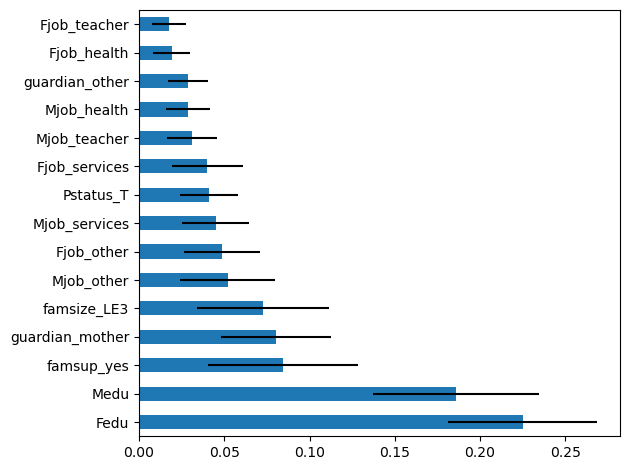

In [335]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance', ascending=False)
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [336]:
from dmba import plotDecisionTree, classificationSummary, regressionSummary

classificationSummary(valid_y, rf.predict(valid_X))


Confusion Matrix (Accuracy 0.1268)

       Prediction
Actual   0   1   2   3   4   5
     0   0 121  88   8   1   1
     1   0  53 109  16  18   3
     2   0   0   0   0   0   0
     3   0   0   0   0   0   0
     4   0   0   0   0   0   0
     5   0   0   0   0   0   0


In [337]:
#predict Success